In [2]:
include("../EuclidElements.jl");

# Book 1

## Proposition 6

If in  a triangle two angles be equal to one another, the sides which subtend the equal angles will also be equal to one another.

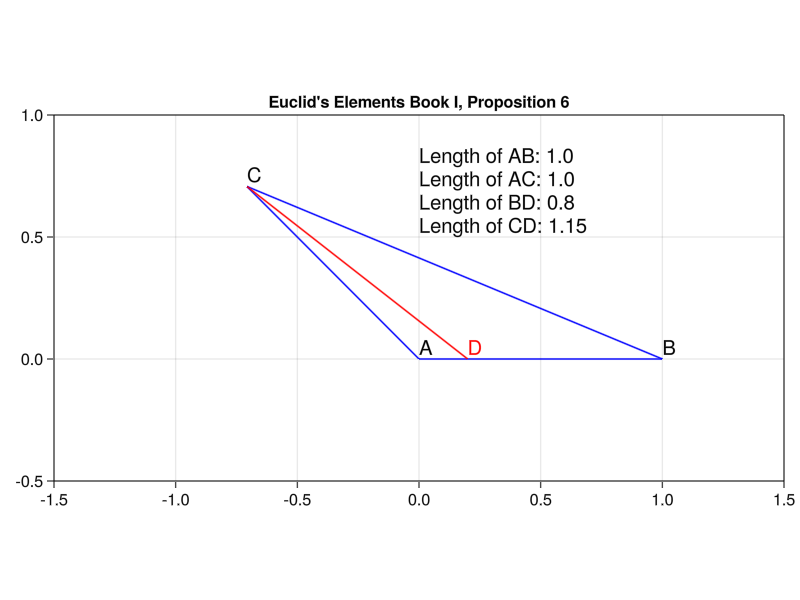

In [4]:
#ABC is isosceles according to Euclid in this one, so AB = AC
len_AB_0 = 1.0
len_AB = Observable(len_AB_0)
∠BAC_0 = 3π/4
∠BAC = Observable(∠BAC_0)

#Construct the triangle...
A_0 = Point2f(0,0)
A = Observable(A_0)
B_0 = Point2f(len_AB_0,0)
B = @lift(Point2f($len_AB,0))
C_0 = Point2f([cos(∠BAC_0), sin(∠BAC_0)]*len_AB_0)
C = @lift(Point2f([cos($∠BAC), sin($∠BAC)]*$len_AB))

# BD = AC is a contradiction due to the sides
D = @lift(continue_line($A, $B, -0.8))

#setup the chart space...
f = Figure()
ax = Axis(f[1,1], aspect=DataAspect(), title="Euclid's Elements Book I, Proposition 6")
xlims!(ax, -1.5,1.5)
ylims!(ax, -0.5,1)

# Draw the lines
lines!(@lift([$A,$B]), color=:blue)
lines!(@lift([$A,$C]), color=:blue)
lines!(@lift([$B,$C]), color=:blue)
lines!(@lift([$C,$D]), color=:red)

#Now draw the point labels
Apoint = text!(A, text="A")
Bpoint = text!(B, text="B")
Cpoint = text!(C, text="C")
Dpoint = text!(D, text="D", color=:red)

text!(Point2f(0, 0.5), 
        text="Length of AB: "*string(round(norm(A[]-B[]),digits=2))*
             "\nLength of AC: "*string(round(norm(A[]-C[]),digits=2))*
             "\nLength of BD: "*string(round(norm(B[]-D[]),digits=2))*
             "\nLength of CD: "*string(round(norm(C[]-D[]),digits=2)))

#Draw and show the chart :)
current_figure()